In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold7_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.047111,-0.084468,0.183206,0.106957,-0.197840,-0.146146,-0.014713,-0.039870,-0.177392,-0.150429,...,-0.054681,0.054666,-0.170043,-0.088327,-0.044075,-0.138131,Abnormal,P31,FP-B,AB01
1,-0.008152,-0.108617,0.332554,0.065598,-0.212385,-0.154046,0.185813,-0.174432,-0.162742,-0.105734,...,0.080151,0.071277,-0.140525,-0.019436,0.056166,-0.147874,Abnormal,P1,FP-A,AB01
2,0.029979,-0.104213,0.186764,0.072720,-0.206438,-0.132990,0.390629,-0.209839,-0.182634,-0.188508,...,0.067272,0.007184,-0.215518,-0.103547,-0.064773,-0.091860,Abnormal,P2,FP-A,AB01
3,0.197579,-0.117897,0.258689,0.024050,-0.209905,-0.083890,0.158171,-0.129445,-0.176343,-0.175681,...,0.002003,0.127952,-0.183598,-0.122935,0.011867,-0.153681,Abnormal,P42,FP-B,AB01
4,-0.001912,-0.121546,0.375175,0.073468,-0.217575,-0.134245,0.273981,-0.185224,-0.157108,-0.152178,...,-0.054425,0.013421,-0.169608,-0.113710,-0.100158,-0.153804,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.491096,1.002230,-0.172730,-0.136594,0.595726,0.547629,-0.132018,0.425446,0.839854,0.207744,...,0.385910,-0.171571,-0.167495,0.940307,-0.085193,0.750029,Normal,P32,FP-B,Normal
4596,-0.011974,0.148026,-0.153517,0.288432,0.228395,0.791473,-0.186303,0.526963,0.464647,0.790330,...,0.025029,-0.189784,-0.117060,0.447950,-0.152273,0.707199,Normal,P42,FP-B,Normal
4597,0.272649,0.555701,-0.185605,0.503418,0.345621,1.116217,-0.118170,0.336528,0.322378,0.282140,...,0.289419,-0.125635,-0.149157,0.913193,0.212130,0.825909,Normal,P52,FP-C,Normal
4598,-0.163618,0.502226,-0.136079,-0.055631,0.857396,0.303407,-0.183531,0.703226,0.402094,0.883147,...,-0.117837,-0.189822,-0.126096,1.014838,-0.189943,0.917289,Normal,P61,FP-C,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4600, 2048)
(4600,)


In [20]:
y[0]

'FP-B'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.562609,0.025737,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.565000,0.023584,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.563913,0.023798,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.561087,0.024680,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.551087,0.024484,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.631304,0.036844,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.635435,0.037161,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.634348,0.039572,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.630217,0.038429,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.600652,0.032638,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5626086956521739

 **print the array of mean scores only 

[0.5626087  0.565      0.56391304 0.56108696 0.55108696 0.63130435
 0.63543478 0.63434783 0.63021739 0.60065217 0.665      0.67065217
 0.66152174 0.66391304 0.61413043 0.66869565 0.66934783 0.66695652
 0.65804348 0.6123913  0.67152174 0.66652174 0.66717391 0.66347826
 0.61195652]

 **examine the best model 

0.6715217391304348
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.6715217391304348


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold7_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,0.025601,-0.099690,-0.072089,-0.052006,0.063536,-0.153030,-0.087412,0.081581,-0.071721,...,-0.153405,-0.192458,-0.040635,0.131490,-0.053713,-0.102947,Abnormal,P52,FP-C,AB01
1,1,-0.037008,-0.118407,-0.034419,0.173833,-0.203284,-0.146452,0.140077,-0.178230,-0.203584,...,0.066462,-0.065711,-0.194194,-0.104079,0.008717,-0.130910,Abnormal,P2,FP-A,AB02
2,2,0.097381,-0.116292,0.088937,0.164948,-0.209908,-0.152135,0.089500,-0.143866,-0.176397,...,0.098394,-0.047233,-0.151940,-0.094315,0.100857,-0.146942,Abnormal,P51,FP-C,AB02
3,3,-0.053959,-0.129774,0.003296,0.124190,-0.239588,-0.157525,0.290814,-0.226371,-0.195872,...,0.092636,-0.063308,-0.199779,-0.140209,-0.032403,-0.136366,Abnormal,P1,FP-A,AB02
4,4,0.154705,-0.118970,0.088303,-0.004174,-0.226507,-0.093808,0.285779,-0.129870,-0.191472,...,0.103408,-0.108480,-0.199459,-0.092198,0.053188,-0.104273,Abnormal,P31,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,652,0.018763,0.786618,-0.152552,0.004148,0.465319,0.373276,-0.115884,0.507926,0.583212,...,0.411906,-0.199250,0.199790,0.679878,0.162925,0.720766,Normal,P32,FP-B,Normal
653,653,-0.096758,-0.040245,-0.138957,0.093709,-0.099716,0.494841,-0.109968,0.454003,0.245495,...,-0.153133,-0.198496,-0.135247,0.014381,-0.020195,-0.110517,Normal,P42,FP-B,Normal
654,654,-0.166961,0.176023,-0.073159,0.128644,0.309635,0.137614,-0.174740,0.220340,-0.051022,...,-0.181926,-0.181339,-0.137622,0.216632,-0.052659,0.098881,Normal,P52,FP-C,Normal
655,655,-0.158293,0.436913,-0.150291,-0.185983,0.383684,0.029321,-0.161464,-0.015472,0.322975,...,-0.205786,-0.223981,-0.120281,0.355565,-0.162169,0.141037,Normal,P61,FP-C,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(657, 2048)
(657,)


In [30]:
y_test

0      FP-C
1      FP-A
2      FP-C
3      FP-A
4      FP-B
       ... 
652    FP-B
653    FP-B
654    FP-C
655    FP-C
656    FP-E
Name: Views, Length: 657, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 46  43  35   3   2]
 [  7 152  33   2   5]
 [  3  33 150  11   0]
 [  0  10  23  64   0]
 [  1   9   0   0  25]]
              precision    recall  f1-score   support

        FP-A       0.81      0.36      0.49       129
        FP-B       0.62      0.76      0.68       199
        FP-C       0.62      0.76      0.68       197
        FP-D       0.80      0.66      0.72        97
        FP-E       0.78      0.71      0.75        35

    accuracy                           0.67       657
   macro avg       0.73      0.65      0.67       657
weighted avg       0.69      0.67      0.66       657



Text(0.5, 21.5, 'Predicted label')

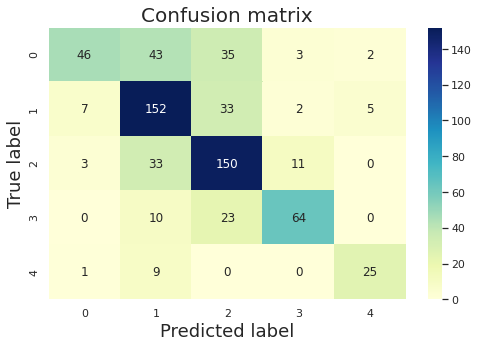

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_7/models/')
filename = "modelrf_AN_5FP_fold7_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)